In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!kaggle datasets download -d kaiska/apparel-dataset

Dataset URL: https://www.kaggle.com/datasets/kaiska/apparel-dataset
License(s): CC0-1.0
 97% 155M/161M [00:00<00:00, 233MB/s]
100% 161M/161M [00:00<00:00, 239MB/s]


In [4]:
! unzip /content/apparel-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: red_shirt/137.jpg       
  inflating: red_shirt/138.jpg       
  inflating: red_shirt/139.jpg       
  inflating: red_shirt/14.jpg        
  inflating: red_shirt/140.jpg       
  inflating: red_shirt/141.jpg       
  inflating: red_shirt/142.jpg       
  inflating: red_shirt/143.jpg       
  inflating: red_shirt/144.jpg       
  inflating: red_shirt/145.jpg       
  inflating: red_shirt/146.jpg       
  inflating: red_shirt/147.jpg       
  inflating: red_shirt/148.jpg       
  inflating: red_shirt/149.jpg       
  inflating: red_shirt/15.jpg        
  inflating: red_shirt/150.jpg       
  inflating: red_shirt/151.jpg       
  inflating: red_shirt/152.jpg       
  inflating: red_shirt/153.jpg       
  inflating: red_shirt/154.jpg       
  inflating: red_shirt/155.jpg       
  inflating: red_shirt/156.jpg       
  inflating: red_shirt/157.jpg       
  inflating: red_shirt/158.jpg       
  inflating: red_shirt/159.jpg       

In [5]:
!kaggle datasets download -d masouduut94/digikala-color-classification

Dataset URL: https://www.kaggle.com/datasets/masouduut94/digikala-color-classification
License(s): GPL-2.0
 70% 25.0M/35.9M [00:00<00:00, 110MB/s] 
100% 35.9M/35.9M [00:00<00:00, 126MB/s]


In [6]:
! unzip /content/digikala-color-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/brown/105735637.jpg  
  inflating: train/brown/105736914.jpg  
  inflating: train/brown/105737049.jpg  
  inflating: train/brown/105739351.jpg  
  inflating: train/brown/105739998.jpg  
  inflating: train/brown/105741279.jpg  
  inflating: train/brown/105742121.jpg  
  inflating: train/brown/105743307.jpg  
  inflating: train/brown/105743416.jpg  
  inflating: train/brown/105745625.jpg  
  inflating: train/brown/105745658.jpg  
  inflating: train/brown/105745804.jpg  
  inflating: train/brown/105746292.jpg  
  inflating: train/brown/105747025.jpg  
  inflating: train/brown/105751285.jpg  
  inflating: train/brown/105751947.jpg  
  inflating: train/brown/105752947.jpg  
  inflating: train/brown/105753529.jpg  
  inflating: train/brown/105754762.jpg  
  inflating: train/brown/105756364.jpg  
  inflating: train/brown/105757456.jpg  
  inflating: train/brown/105757491.jpg  
  inflating: train/brown/105759450.jpg  
  infl

In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

In [8]:
parent = '/content/'
cloth_path = os.path.join(parent, f'cloth/')
cloth_train_path = os.path.join(cloth_path, f'train/')
cloth_val_path = os.path.join(cloth_path, f'validation/')
os.mkdir(cloth_path)
os.mkdir(cloth_train_path)
os.mkdir(cloth_val_path)

shirt_train_path = os.path.join(cloth_train_path, 'shirt/')
suit_train_path = os.path.join(cloth_train_path, 'suit/')
hoodie_train_path = os.path.join(cloth_train_path, 'hoodie')
dress_train_path = os.path.join(cloth_train_path, 'dress/')
pants_train_path = os.path.join(cloth_train_path, 'pants/')
skirt_train_path = os.path.join(cloth_train_path, 'skirt/')
shorts_train_path = os.path.join(cloth_train_path, 'shorts/')

shirt_val_path = os.path.join(cloth_val_path, 'shirt/')
suit_val_path = os.path.join(cloth_val_path, 'suit/')
hoodie_val_path = os.path.join(cloth_val_path, 'hoodie')
dress_val_path = os.path.join(cloth_val_path, 'dress/')
pants_val_path = os.path.join(cloth_val_path, 'pants/')
skirt_val_path = os.path.join(cloth_val_path, 'skirt/')
shorts_val_path = os.path.join(cloth_val_path, 'shorts/')

In [9]:
color_path = os.path.join(parent, f'color/')
color_train_path = os.path.join(color_path, f'train/')
color_val_path = os.path.join(color_path, f'validation/')
os.mkdir(color_path)
os.mkdir(color_train_path)
os.mkdir(color_val_path)

black_train_path = os.path.join(color_train_path, 'black/')
blue_train_path = os.path.join(color_train_path, 'blue/')
brown_train_path = os.path.join(color_train_path, 'brown/')
green_train_path = os.path.join(color_train_path, 'green/')
pink_train_path = os.path.join(color_train_path, 'pink/')
red_train_path = os.path.join(color_train_path, 'red/')
silver_train_path = os.path.join(color_train_path, 'silver/')
white_train_path = os.path.join(color_train_path, 'white/')
yellow_train_path = os.path.join(color_train_path, 'yellow/')
grey_train_path = os.path.join(color_train_path, 'grey/')
orange_train_path = os.path.join(color_train_path, 'orange/')
purple_train_path = os.path.join(color_train_path, 'purple/')

black_val_path = os.path.join(color_val_path, 'black/')
blue_val_path = os.path.join(color_val_path, 'blue/')
brown_val_path = os.path.join(color_val_path, 'brown/')
green_val_path = os.path.join(color_val_path, 'green/')
pink_val_path = os.path.join(color_val_path, 'pink/')
red_val_path = os.path.join(color_val_path, 'red/')
silver_val_path = os.path.join(color_val_path, 'silver/')
white_val_path = os.path.join(color_val_path, 'white/')
yellow_val_path = os.path.join(color_val_path, 'yellow/')
grey_val_path = os.path.join(color_val_path, 'grey/')
orange_val_path = os.path.join(color_val_path, 'orange/')
purple_val_path = os.path.join(color_val_path, 'purple/')

In [10]:
def split_data(source_dir, train_dir, val_dir, split):
  os.mkdir(train_dir)
  os.mkdir(val_dir)
  img = [file for file in os.listdir(source_dir)]
  index = int(len(img) * split)
  train = img[:index]
  val = img[index:]

  for file in train:
    shutil.copyfile(os.path.join(source_dir, file), os.path.join(train_dir,file))
  for file in val:
    shutil.copyfile(os.path.join(source_dir, file), os.path.join(val_dir,file))

In [11]:
split = 0.9
shirt_path = '/content/black_shirt'
suit_path = '/content/black_suit'
hoodie_path = '/content/red_hoodie'
dress_path = '/content/black_dress'
pants_path = '/content/brown_pants'
skirt_path = '/content/silver_skirt'
shorts_path = '/content/black_shorts'

split_data(shirt_path, shirt_train_path, shirt_val_path, split)
split_data(suit_path, suit_train_path, suit_val_path, split)
split_data(hoodie_path, hoodie_train_path, hoodie_val_path, split)
split_data(dress_path, dress_train_path, dress_val_path, split)
split_data(pants_path, pants_train_path, pants_val_path, split)
split_data(skirt_path, skirt_train_path, skirt_val_path, split)
split_data(shorts_path, shorts_train_path, shorts_val_path, split)

In [12]:
split = 0.9
black_path = '/content/train/black'
blue_path = '/content/train/blue'
brown_path = '/content/train/brown'
green_path = '/content/train/green'
grey_path = '/content/train/grey'
orange_path = '/content/train/orange'
pink_path = '/content/train/pink'
purple_path = '/content/train/purple'
red_path = '/content/train/red'
silver_path = '/content/train/silver'
white_path = '/content/train/white'
yellow_path = '/content/train/yellow'

split_data(black_path, black_train_path, black_val_path, split)
split_data(blue_path, blue_train_path, blue_val_path, split)
split_data(brown_path, brown_train_path, brown_val_path, split)
split_data(green_path, green_train_path, green_val_path, split)
split_data(grey_path, grey_train_path, grey_val_path, split)
split_data(orange_path, orange_train_path, orange_val_path, split)
split_data(pink_path, pink_train_path, pink_val_path, split)
split_data(purple_path, purple_train_path, purple_val_path, split)
split_data(red_path, red_train_path, red_val_path, split)
split_data(silver_path, silver_train_path, silver_val_path, split)
split_data(white_path, white_train_path, white_val_path, split)
split_data(yellow_path, yellow_train_path, yellow_val_path, split)

In [13]:
print(f'Jumlah train shirt: {len(os.listdir(shirt_train_path))}')
print(f'Jumlah val shirt: {len(os.listdir(shirt_val_path))}')
print(f'Jumlah train suit: {len(os.listdir(suit_train_path))}')
print(f'Jumlah val suit: {len(os.listdir(suit_val_path))}')
print(f'Jumlah train hoodie: {len(os.listdir(hoodie_train_path))}')
print(f'Jumlah val hoodie: {len(os.listdir(hoodie_val_path))}')
print(f'Jumlah train dress: {len(os.listdir(dress_train_path))}')
print(f'Jumlah val dress: {len(os.listdir(dress_val_path))}')
print(f'Jumlah train pants: {len(os.listdir(pants_train_path))}')
print(f'Jumlah val pants: {len(os.listdir(pants_val_path))}')
print(f'Jumlah train skirt: {len(os.listdir(skirt_train_path))}')
print(f'Jumlah val skirt: {len(os.listdir(skirt_val_path))}')
print(f'Jumlah train shorts: {len(os.listdir(shorts_train_path))}')
print(f'Jumlah val shorts: {len(os.listdir(shorts_val_path))}')

Jumlah train shirt: 643
Jumlah val shirt: 72
Jumlah train suit: 288
Jumlah val suit: 32
Jumlah train hoodie: 314
Jumlah val hoodie: 35
Jumlah train dress: 405
Jumlah val dress: 45
Jumlah train pants: 279
Jumlah val pants: 32
Jumlah train skirt: 324
Jumlah val skirt: 37
Jumlah train shorts: 295
Jumlah val shorts: 33


In [14]:
print(f'Jumlah train black: {len(os.listdir(black_train_path))}')
print(f'Jumlah val black: {len(os.listdir(black_val_path))}')

print(f'Jumlah train blue: {len(os.listdir(blue_train_path))}')
print(f'Jumlah val blue: {len(os.listdir(blue_val_path))}')

print(f'Jumlah train brown: {len(os.listdir(brown_train_path))}')
print(f'Jumlah val brown: {len(os.listdir(brown_val_path))}')

print(f'Jumlah train green: {len(os.listdir(green_train_path))}')
print(f'Jumlah val green: {len(os.listdir(green_val_path))}')

print(f'Jumlah train grey: {len(os.listdir(grey_train_path))}')
print(f'Jumlah val grey: {len(os.listdir(grey_val_path))}')

print(f'Jumlah train orange: {len(os.listdir(orange_train_path))}')
print(f'Jumlah val orange: {len(os.listdir(orange_val_path))}')

print(f'Jumlah train pink: {len(os.listdir(pink_train_path))}')
print(f'Jumlah val pink: {len(os.listdir(pink_val_path))}')

print(f'Jumlah train purple: {len(os.listdir(purple_train_path))}')
print(f'Jumlah val purple: {len(os.listdir(purple_val_path))}')

print(f'Jumlah train red: {len(os.listdir(red_train_path))}')
print(f'Jumlah val red: {len(os.listdir(red_val_path))}')

print(f'Jumlah train silver: {len(os.listdir(silver_train_path))}')
print(f'Jumlah val silver: {len(os.listdir(silver_val_path))}')

print(f'Jumlah train white: {len(os.listdir(white_train_path))}')
print(f'Jumlah val white: {len(os.listdir(white_val_path))}')

print(f'Jumlah train yellow: {len(os.listdir(yellow_train_path))}')
print(f'Jumlah val yellow: {len(os.listdir(yellow_val_path))}')

Jumlah train black: 300
Jumlah val black: 34
Jumlah train blue: 585
Jumlah val blue: 66
Jumlah train brown: 612
Jumlah val brown: 69
Jumlah train green: 633
Jumlah val green: 71
Jumlah train grey: 617
Jumlah val grey: 69
Jumlah train orange: 286
Jumlah val orange: 32
Jumlah train pink: 306
Jumlah val pink: 35
Jumlah train purple: 316
Jumlah val purple: 36
Jumlah train red: 620
Jumlah val red: 69
Jumlah train silver: 315
Jumlah val silver: 35
Jumlah train white: 635
Jumlah val white: 71
Jumlah train yellow: 384
Jumlah val yellow: 43


In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)

cloth_train_generator = train_datagen.flow_from_directory(directory = cloth_train_path,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    target_size = (256,256))
color_train_generator = train_datagen.flow_from_directory(directory = color_train_path,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (256,256))

validation_datagen = ImageDataGenerator (rescale = 1./255)
cloth_val_generator = train_datagen.flow_from_directory(directory = cloth_val_path,
                                                    class_mode = 'categorical',
                                                    color_mode = 'grayscale',
                                                    target_size = (256,256))
color_val_generator = train_datagen.flow_from_directory(directory = color_val_path,
                                                    class_mode = 'categorical',
                                                    color_mode = 'rgb',
                                                    target_size = (256,256))



Found 2548 images belonging to 7 classes.
Found 5609 images belonging to 12 classes.
Found 286 images belonging to 7 classes.
Found 630 images belonging to 12 classes.


In [16]:
def cloth_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu, input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(7, activation= tf.keras.activations.softmax)
  ])


  model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

In [17]:
def color_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu, input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation= tf.keras.activations.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(12, activation= tf.keras.activations.softmax)
  ])


  model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])
  return model

In [18]:
model = cloth_model()

history = model.fit(cloth_train_generator,
          epochs = 10,
          validation_data = cloth_val_generator)

Epoch 1/10
80/80 [==============================] - 18s 129ms/step - loss: 1.3820 - accuracy: 0.6915 - val_loss: 0.6324 - val_accuracy: 0.7972
Epoch 2/10
80/80 [==============================] - 9s 105ms/step - loss: 0.2565 - accuracy: 0.9168 - val_loss: 0.5037 - val_accuracy: 0.8357
Epoch 3/10
80/80 [==============================] - 8s 105ms/step - loss: 0.0968 - accuracy: 0.9694 - val_loss: 0.4232 - val_accuracy: 0.8706
Epoch 4/10
80/80 [==============================] - 8s 101ms/step - loss: 0.0318 - accuracy: 0.9914 - val_loss: 0.4439 - val_accuracy: 0.8846
Epoch 5/10
80/80 [==============================] - 8s 105ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4731 - val_accuracy: 0.8951
Epoch 6/10
80/80 [==============================] - 8s 103ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.5182 - val_accuracy: 0.8951
Epoch 7/10
80/80 [==============================] - 8s 105ms/step - loss: 3.9898e-04 - accuracy: 1.0000 - val_loss: 0.5421 - val_accuracy: 0.8951
E

In [20]:
color_model = color_model()

history2 = color_model.fit(color_train_generator,
          epochs = 10,
          validation_data = color_val_generator)

Epoch 1/10
176/176 [==============================] - 30s 155ms/step - loss: 2.3650 - accuracy: 0.4334 - val_loss: 1.5670 - val_accuracy: 0.5079
Epoch 2/10
176/176 [==============================] - 20s 114ms/step - loss: 1.2083 - accuracy: 0.6153 - val_loss: 1.1124 - val_accuracy: 0.6270
Epoch 3/10
176/176 [==============================] - 20s 114ms/step - loss: 0.7366 - accuracy: 0.7625 - val_loss: 1.1849 - val_accuracy: 0.6492
Epoch 4/10
176/176 [==============================] - 21s 118ms/step - loss: 0.4477 - accuracy: 0.8579 - val_loss: 1.5462 - val_accuracy: 0.6270
Epoch 5/10
176/176 [==============================] - 20s 114ms/step - loss: 0.3353 - accuracy: 0.9035 - val_loss: 1.5112 - val_accuracy: 0.6032
Epoch 6/10
176/176 [==============================] - 21s 119ms/step - loss: 0.3232 - accuracy: 0.9018 - val_loss: 1.7106 - val_accuracy: 0.6556
Epoch 7/10
176/176 [==============================] - 21s 117ms/step - loss: 0.2131 - accuracy: 0.9388 - val_loss: 1.8151 - val_ac

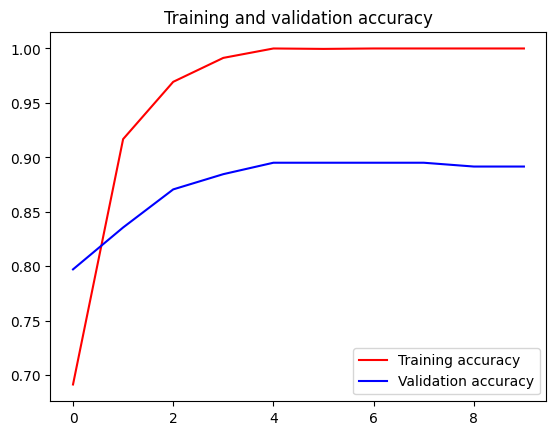

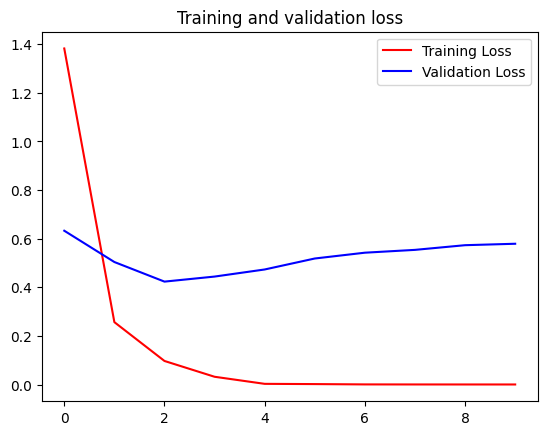

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

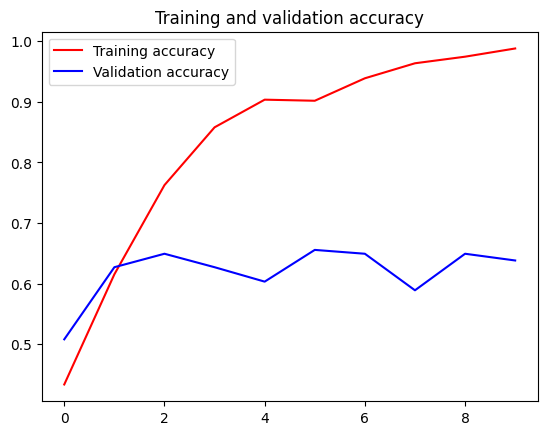

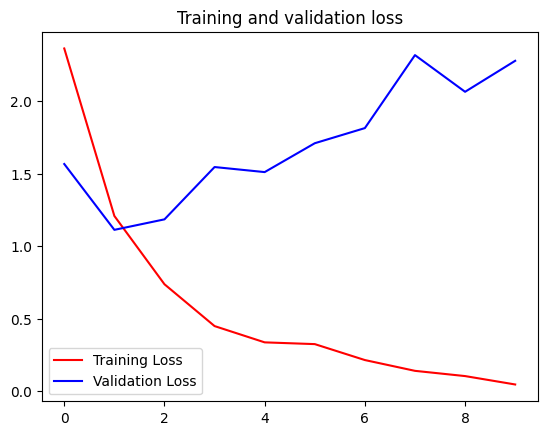

In [22]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

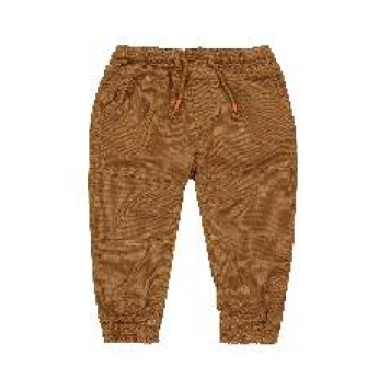

In [240]:
path = '/content/train/brown/105196553.jpg'
# Memuat gambar dan mengubah ukurannya
img = load_img(path, target_size=(256, 256))
x = img_to_array(img)

plt.imshow(x.astype(int))
plt.axis('off')  # Untuk menyembunyikan sumbu
plt.show()

In [241]:
def convert_to_grayscale(image):
    image_gray = tf.image.rgb_to_grayscale(image)
    return image_gray

x_gray = convert_to_grayscale(x)

In [242]:
x_gray = np.expand_dims(x_gray, axis=0)
cloth_class = model.predict(x_gray)
cloth_class2 = np.argmax(cloth_class)
if cloth_class2 == 0:
  cloth_class = 'Dress'
elif cloth_class2 == 1:
  cloth_class = 'Hoodie'
elif cloth_class2 == 2:
  cloth_class = 'Pants'
elif cloth_class2 == 3:
  cloth_class = 'Shirt'
elif cloth_class2 == 4:
  cloth_class = 'Shorts'
elif cloth_class2 == 5:
  cloth_class = 'Skirt'
else:
  cloth_class = 'Suit'


print(cloth_class)


1/1 [==============================] - 0s 18ms/step
Shorts


In [243]:
x = np.expand_dims(x, axis=0)
color_class = color_model.predict(x)
color_class2 = np.argmax(color_class)

if color_class2 == 0:
    color_class3 = 'Black'
elif color_class2 == 1:
    color_class3 = 'Blue'
elif color_class2 == 2:
    color_class3 = 'Brown'
elif color_class2 == 3:
    color_class3 = 'Green'
elif color_class2 == 4:
    color_class3 = 'Grey'
elif color_class2 == 5:
    color_class3 = 'Orange'
elif color_class2 == 6:
    color_class3 = 'Pink'
elif color_class2 == 7:
    color_class3 = 'Purple'
elif color_class2 == 8:
    color_class3 = 'Red'
elif color_class2 == 9:
    color_class3 = 'Silver'
elif color_class2 == 10:
    color_class3 = 'White'
else:
    color_class3 = 'Yellow'

print(color_class3)

1/1 [==============================] - 0s 20ms/step
Brown
